In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [2]:
df = pd.read_csv('tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
x = df.iloc[0]
x

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

##### Genres Format
As we can see below, the genres is in json format. 
We are interested in name attributes. 
Some names contains two words, ex. "Science Fiction" we wanted treat them as one word.

In [7]:
x['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [8]:
x['keywords']
# Here again we are interested in name attributes.

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

### Json
- The next step is to convert the JSON string into a format that we can actually use in python, namely al ist of python dictionaries. 

In [9]:
j = json.loads(x['genres'])
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [10]:
# Converting the json format into a single line of text
# (only our target, which is the name attribute 
# This is what is required by TF-IDF
' '.join(''.join(jj['name'].split()) for jj in j)

'Action Adventure Fantasy ScienceFiction'

In [13]:
# Covert the relevant data for each movie into a single strint
# To be ingested by TfidfVectorizer

def genres_and_keywords_to_string(row):
    genres = json.loads(row['genres'])
    genres = ' '.join(''.join(j['name'].split()) for j in genres)
    
    keywords = json.loads(row['keywords'])
    keywords = ' '.join(''.join(k['name'].split()) for k in keywords)
    
    return "%s %s" % (genres, keywords)

In [15]:
# Create a new string representative of each movie
df['string'] = df.apply(genres_and_keywords_to_string, axis=1)

df['string']

0       Action Adventure Fantasy ScienceFiction cultur...
1       Adventure Fantasy Action ocean drugabuse exoti...
2       Action Adventure Crime spy basedonnovel secret...
3       Action Crime Drama Thriller dccomics crimefigh...
4       Action Adventure ScienceFiction basedonnovel m...
                              ...                        
4798    Action Crime Thriller unitedstates–mexicobarri...
4799                                      Comedy Romance 
4800    Comedy Drama Romance TVMovie date loveatfirsts...
4801                                                     
4802      Documentary obsession camcorder crush dreamgirl
Name: string, Length: 4803, dtype: object

In [16]:
# Create a tf-idf vectorizer object
# max_features will limit the number of columns in the final matrix.

tfidf = TfidfVectorizer(max_features=2000)

In [18]:
# Create a data matrix from the overviews

X = tfidf.fit_transform(df['string'])
X

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 37285 stored elements in Compressed Sparse Row format>

In [26]:
print(X)

  (0, 10)	0.1762040466935279
  (0, 1114)	0.277382848565207
  (0, 180)	0.21696573949004844
  (0, 1641)	0.20547211662743248
  (0, 1068)	0.2589461449112578
  (0, 312)	0.277382848565207
  (0, 56)	0.26699983551812234
  (0, 1832)	0.28396319292529476
  (0, 50)	0.18527447977794834
  (0, 1652)	0.22178515065460125
  (0, 1484)	0.0961800172466409
  (0, 723)	0.2589461449112578
  (0, 1661)	0.228884812911084
  (0, 1638)	0.27181924668267515
  (0, 1654)	0.27181924668267515
  (0, 722)	0.20233170452309615
  (0, 437)	0.24431210994430547
  (0, 1531)	0.11510977007862505
  (0, 644)	0.12294608887976165
  (0, 26)	0.10088050912368217
  (0, 12)	0.0874731672898575
  (1, 33)	0.16415861816686098
  (1, 1744)	0.2909976154933468
  (1, 1316)	0.25630366764810436
  (1, 672)	0.28516093564906125
  :	:
  (4796, 1801)	0.32441336771749485
  (4796, 1795)	0.13653630837951553
  (4796, 538)	0.10197282484942657
  (4796, 1531)	0.1872373790962834
  (4797, 702)	0.9301948868941571
  (4797, 1795)	0.3670660327461076
  (4798, 1105)	0.652

In [19]:
# Generate a mapping from movie title -> index (ind df)
# It's not obvious which row of the Matrix correponds to which movie.
# Our data has been processed in order, so the movies in our data frame whill correspond to 
# to the vectors in our TFIDF matrix

# IN some cases it would be useful to have mapping that tells us for
# given movie which index does it have.

movie2idx = pd.Series(df.index, index=df['title'])
movie2idx

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [22]:
idx = movie2idx['Spectre']
idx

2

In [23]:
# this idx is used to grap the correct row inside TF-IDF matrix
query = X[idx]
query

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [25]:
# Let's see what values are in the matrix
# Print the query to vector
print(query.toarray())

[[0. 0. 0. ... 0. 0. 0.]]


In [27]:
# Compute similarity between query and every vector in X
scores = cosine_similarity(query, X)
scores

array([[0.03694098, 0.03875415, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [28]:
# Currently the array is 1 x N, make it just a 1-D array
scores = scores.flatten()
scores

array([0.03694098, 0.03875415, 1.        , ..., 0.        , 0.        ,
       0.        ])

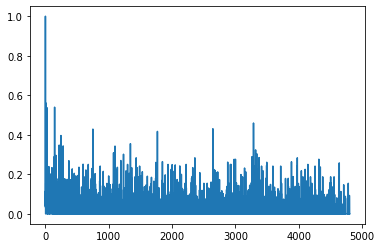

In [29]:
plt.plot(scores)

In [30]:
# Sorting, to show most similar movies first.
# By default argsort sorts in ascending order, 
# We want it to be sorted on descending order so that most similar movies come first.

(-scores).argsort()

array([   2,   11,  147, ..., 2438, 2443, 4802], dtype=int64)

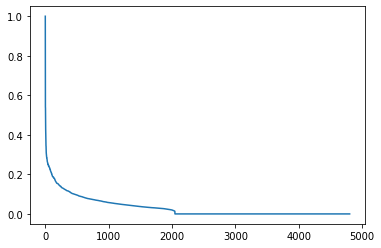

In [33]:
plt.plot(scores[(-scores).argsort()])

In [35]:
# get top 5 matches
# Exclude self (similarity between query and itself yields max score)

recommended_idx = (-scores).argsort()[1:6]

# Convert indeces back to titles
df['title'].iloc[recommended_idx]

11      Quantum of Solace
147       Die Another Day
29                Skyfall
3285             Restless
2644            Ong Bak 2
Name: title, dtype: object

In [40]:
# Now let's create function that generates recommendations

def recommend(title):
    # get the row in the df for this movie
    idx = movie2idx[title]
    if type(idx) == pd.Series:
        idx = idx.iloc[0]
    
    # Now calculate the pairwise similarity for this movie
    query = X[idx]
    scores = cosine_similarity(query, X)
    
    scores = scores.flatten()
    
    # get the indeces of the highest scoring movies
    # get the first K recommendations
    # don't return itself!
    
    recommended_idx = (-scores).argsort()[1: 6]
    
    # return the titles of the recommendations
    return df['title'].iloc[recommended_idx]

In [41]:
print("Recommendations for 'Scream 3': ")
print(recommend('Scream 3'))

Recommendations for 'Scream 3': 
3902    Friday the 13th Part VI: Jason Lives
4628                          Graduation Day
4053        Friday the 13th: A New Beginning
4048                             The Calling
1084                         The Glimmer Man
Name: title, dtype: object


In [42]:
print("Recommendations for 'Mortal Kombat': ")
print(recommend('Mortal Kombat'))

Recommendations for 'Mortal Kombat': 
1611              Mortal Kombat: Annihilation
1670                       DOA: Dead or Alive
3856              In the Name of the King III
1001    Street Fighter: The Legend of Chun-Li
2237                        Alone in the Dark
Name: title, dtype: object


In [44]:
print("Recommendations for 'Runaway Bride': ")
print(recommend('Runaway Bride'))

Recommendations for 'Runaway Bride': 
4115                    House of D
2325    My Big Fat Greek Wedding 2
4604         It Happened One Night
3313                  An Education
2689            Our Family Wedding
Name: title, dtype: object
